## Goals
1. What are the most important features for predicting X as a target variable?
2. Which classification approach do you prefer for the prediction of X as a target variable, and why?
3. Why is dimensionality reduction important in machine learning?

## Understanding data variables
### Content
The dataset was provided by the Mexican government (link). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

1. sex: 1 for female and 2 for male.
2. age: of the patient.
3. classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
   degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
4. patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
5. pneumonia: whether the patient already have air sacs inflammation or not.
6. pregnancy: whether the patient is pregnant or not.
7. diabetes: whether the patient has diabetes or not.
8. copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
9. asthma: whether the patient has asthma or not.
10. inmsupr: whether the patient is immunosuppressed or not.
11. hypertension: whether the patient has hypertension or not.
12. cardiovascular: whether the patient has heart or blood vessels related disease.
13. renal chronic: whether the patient has chronic renal disease or not.
14. other disease: whether the patient has other disease or not.
15. obesity: whether the patient is obese or not.
16. tobacco: whether the patient is a tobacco user.
17. usmr: Indicates whether the patient treated medical units of the first, second or third level.
18. medical unit: type of institution of the National Health System that provided the care.
19. intubed: whether the patient was connected to the ventilator.
20. icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
21. date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.


## Reading covid dataset to pandas dataframe

In [1]:
import pandas as pd # Helps to work with pandas dataframe
import seaborn as sns # Help with visualisation 
import matplotlib.pyplot as plt # Helps with visualization
import numpy as np # Helps to work with numbers and arrithmetic operation
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('Covid Data.csv')
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [3]:
pd.set_option('display.max_columns', None) #This helps to display the entire column in df
#pd.set_option('display.max_rows', None)
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97


## Early data analysis
Exploring the nature or dataset

In [4]:
df.shape
# There are 21 features and 1,048,575 rows

(1048575, 21)

In [5]:
df.duplicated().sum()

812049

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [7]:
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

### Null values
Though the 'isnull()'method had returned no null values, The dataset litrature however stated that values such as 97, 98, 99.. are used to fill null values and should be treated as null values. 

To progress, we will count the values in each variable to look for this null values.

In [8]:
df['PREGNANT'].unique()
# The pregnant hase this values "97" and "98"

array([ 2, 97, 98,  1], dtype=int64)

In [9]:
# Now let's count how many of this null values we have in 'pregnant'
df['PREGNANT'].value_counts()
# As shown there are 527265 null values in the pregnant variables

97    523511
2     513179
1       8131
98      3754
Name: PREGNANT, dtype: int64

In [10]:
no=[523511,513179,8131,3754]
w= sum(no)
print(w)

1048575


According to logic, only biological females can get pregnant, and the data literature did not tell us otherwise, so to be able to handle the propotion of non pregant patient, we would value count the gender column and see the number of females and males in them

In [11]:
# 1: Female and 2: Male
df['SEX'].unique()

array([1, 2], dtype=int64)

In [12]:
df['SEX'].value_counts()

1    525064
2    523511
Name: SEX, dtype: int64

In [13]:
# So according to results there are 523511 male, which is the same null value represented with 97, we would replace 97 with 2
df['PREGNANT'].replace(98,1,inplace=True)
df['PREGNANT'].replace(97,2,inplace=True) # inplace means replace in the main df

In [14]:
df['PREGNANT'].value_counts()
#2: Non pregnant. This value contain all male patient, and women that were not pregnant too. 
#1: Pregant. This are the assumed pregnant women. 

2    1036690
1      11885
Name: PREGNANT, dtype: int64

In [15]:
df['USMER'].value_counts()
# No null values in Usmer

2    662903
1    385672
Name: USMER, dtype: int64

In [16]:
df['MEDICAL_UNIT'].value_counts()
#No null values in the 'medical unit'

12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: MEDICAL_UNIT, dtype: int64

In [17]:
df['PATIENT_TYPE'].value_counts()
#No null values in the patient type

1    848544
2    200031
Name: PATIENT_TYPE, dtype: int64

In [18]:
df['DATE_DIED'].value_counts()
# 9999-99-99: Represent patients that did not die
# All other dates represents patient that died
# Since this can be categoried into 2 classes, died:1 did not die:2

9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64

In [19]:
# Died= df['DATE_DIED'].value_counts()
def get_die(value):
    if (value=='9999-99-99'):
        return 2
    else:
        return 1

In [70]:
df['Died'].unique()
#1: Died
#2: Survided

array([1, 2], dtype=int64)

In [20]:
df['Died']= df['DATE_DIED'].apply(get_die)
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,Died
0,2,1,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97,1
1,2,1,2,1,03/06/2020,97,1,72,2,2,2,2,2,1,2,2,1,1,2,5,97,1
2,2,1,2,2,09/06/2020,1,2,55,2,1,2,2,2,2,2,2,2,2,2,3,2,1
3,2,1,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97,1
4,2,1,2,1,21/06/2020,97,2,68,2,1,2,2,2,1,2,2,2,2,2,3,97,1


In [21]:
# Lets count the values in the died column to make sure we got all unique values accounted for
df['Died'].value_counts()
# Now a new column Died as been added to df where 1:Died, 2: Did not die 

2    971633
1     76942
Name: Died, dtype: int64

In [22]:
# Droping he date_died column
df.drop(['DATE_DIED'], axis=1, inplace=True)

In [23]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,Died
0,2,1,1,1,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97,1
1,2,1,2,1,97,1,72,2,2,2,2,2,1,2,2,1,1,2,5,97,1
2,2,1,2,2,1,2,55,2,1,2,2,2,2,2,2,2,2,2,3,2,1
3,2,1,1,1,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97,1
4,2,1,2,1,97,2,68,2,1,2,2,2,1,2,2,2,2,2,3,97,1


## checking for outliers in the age column 
We are doing this to be able to see the highest age and the lowest age of patient

Text(0.5, 1.0, 'AGE')

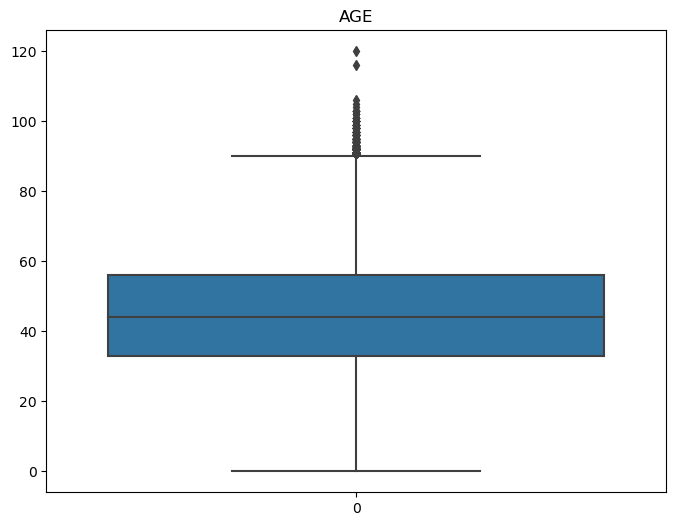

In [58]:
# looking for outliers use bok plot 
plt.figure(figsize=(8,6)) 
sns.boxplot(data=df["AGE"]) # This code utilises seaborn to plot a box plot of credit_score 
plt.title("AGE")# This defines the title of the boxplot 

In [60]:
df["AGE"].describe()

count    388878.000000
mean         45.146370
std          16.452436
min           0.000000
25%          33.000000
50%          44.000000
75%          56.000000
max         120.000000
Name: AGE, dtype: float64

In [62]:
perc_0= (df[df['AGE']==0].shape[0]/df.shape[0])*100
perc_0

0.190033892377558

As shown in the boxplot, majority of the patient are between age 0 and aproximately 95 years old, with some outliers above 100. However, based on domain knowledge, covid 19 had been reported to have more fatal effect on old patient conpared to younger pateint so we believe this outliers are significant so we will keep them. Paient that are 0 years seems unrealistic but they could be babies that are less than a year old, so we would consider them significant too so we will keep them, and according to percentahe estimation, they make up for over 19% of the total age population. 

## Grouping patient age
1.    0:childrens
2.    1:adult
3.    2:old
4.    3:Senior's

In [63]:
def Age_cat(x):
    if(x<=15):
        return 0
    elif(x<=30):
        return 1
    elif(x<=60):
        return 2
    else:
        return 3
df['AGE_Cat']=df['AGE'].apply(Age_cat)

In [64]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,Died,AGE_Cat
0,2,1,1,1,1,65,2,2,2,2,2,1,2,2,2,2,2,3,1,3
2,2,1,2,2,2,55,2,1,2,2,2,2,2,2,2,2,2,3,1,2
4,2,1,2,1,2,68,2,1,2,2,2,1,2,2,2,2,2,3,1,3
5,2,1,1,2,1,40,2,2,2,2,2,2,2,2,2,2,2,3,2,2
6,2,1,1,1,2,64,2,2,2,2,2,2,2,2,2,2,2,3,2,3


In [66]:
df['AGE_Cat'].unique()
#0:childrens
#1:adult
#2:old
#3:Senior's

array([3, 2, 1, 0], dtype=int64)

In [67]:
df.drop(['AGE'], axis=1,inplace=True)

In [68]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,Died,AGE_Cat
0,2,1,1,1,1,2,2,2,2,2,1,2,2,2,2,2,3,1,3
2,2,1,2,2,2,2,1,2,2,2,2,2,2,2,2,2,3,1,2
4,2,1,2,1,2,2,1,2,2,2,1,2,2,2,2,2,3,1,3
5,2,1,1,2,1,2,2,2,2,2,2,2,2,2,2,2,3,2,2
6,2,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,3,2,3


In [69]:
df['Died'].unique()
#1: Died
#2: Survided

array([1, 2], dtype=int64)

Text(0, 0.5, 'count')

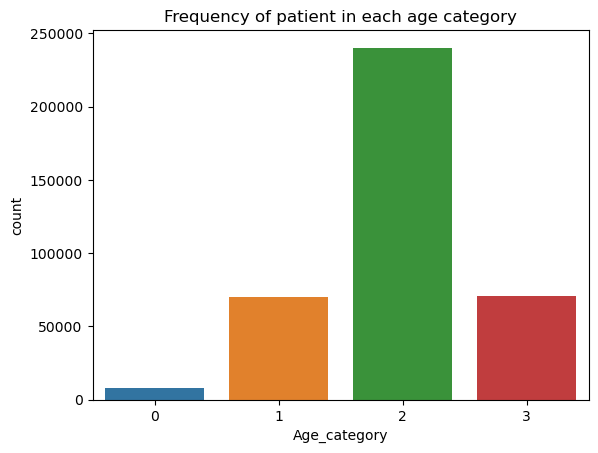

In [74]:
sns.countplot(x='AGE_Cat', data=df)
plt.title('Frequency of patient in each age category')
plt.xlabel('Age_category')
plt.ylabel('count')

In [75]:
df['AGE_Cat'].value_counts()

2    240238
3     70582
1     70128
0      7930
Name: AGE_Cat, dtype: int64

The above plot counts the number of patients in each age category. We plotted this to see the proportion of covid_19 patient's in each age category. Also to see which age group recorded the highest counts of covid_19. 
As shown in the plot, age categories 2 which are the patients that are between age (30-60) years old have the highest counts, followed by patients in the 3 category which are the patients that are between age (60-120) years old, followed by patients in the 1 category which are the patients that are between age (>15-30) years old. The children, age (0-15) years old, have the lowest count. 

Text(0, 0.5, 'count')

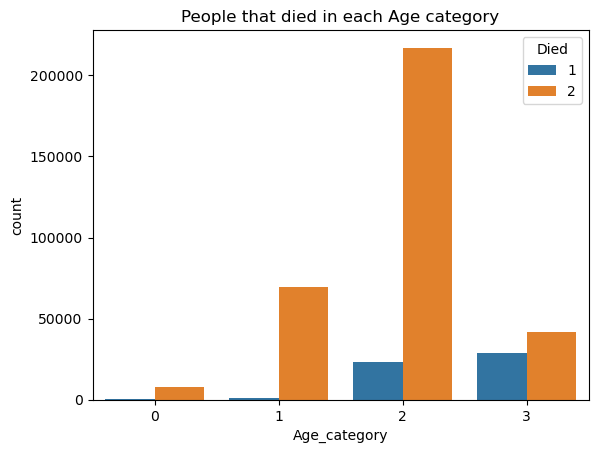

In [72]:
sns.countplot(x='AGE_Cat', data=df, hue= 'Died')

plt.title('People that died in each Age category')
plt.xlabel('Age_category')
plt.ylabel('count')

To further explore the age category and compare to the proportion of patients that died and survied in each category. This plot above shows that there are more deat that survival in the senoir patients that other age groups. Furthermore, though the count plot show that the old age categories recorded the highest number of covid_19 cases, they number of survival in this age group is higher that those that died in the age group.

In [24]:
#INTUBED 
#df['INTUBED'].value_counts()

In [25]:
# Funtion to cal total null value
#def get_null(variable):
 #   for value in variable:
  #      total_Null= sum(variable)
   # return total_Null
#null_in=[848544,7325]
#Total_Null= get_null(null_in)
#Total_Null

In [26]:
#n=len(df['INTUBED'])
#n

In [27]:
#percent_null_Intubate = (Total_Null/n)*100
#percent_null_Intubate
# This shows that over 81 % of the data in the Intubated variable are null values so we will drop the column to
# Avoid introducing bias

In [28]:
#df.drop(['INTUBED'], axis=1, inplace=True)
#df.head()

In [29]:
#PNEUMONIA
#df['PNEUMONIA'].value_counts()

To be able to veiw all the null values at the same time, we will explicitly ask pandas to treat the 97, 99, 98 values as null values

In [30]:
# This code explicitly tell pandas to replace the 97, 98, 99 values as NAN/missing values
feauture=["INTUBED","PNEUMONIA","DIABETES","COPD","ASTHMA","INMSUPR","HIPERTENSION","OTHER_DISEASE","CARDIOVASCULAR","OBESITY","RENAL_CHRONIC","TOBACCO","ICU"]
for variable in feauture: 
    df[variable]=df[variable].replace([98,97,99],np.nan)

In [31]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,Died
0,2,1,1,1,NaN,1.0,65,2,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN,1
1,2,1,2,1,NaN,1.0,72,2,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,NaN,1
2,2,1,2,2,1.0,2.0,55,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
3,2,1,1,1,NaN,2.0,53,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,1
4,2,1,2,1,NaN,2.0,68,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN,1


In [32]:
#Now we are bale to get the missing values
df.isnull().sum()

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
INTUBED                 855869
PNEUMONIA                16003
AGE                          0
PREGNANT                     0
DIABETES                  3338
COPD                      3003
ASTHMA                    2979
INMSUPR                   3404
HIPERTENSION              3104
OTHER_DISEASE             5045
CARDIOVASCULAR            3076
OBESITY                   3032
RENAL_CHRONIC             3006
TOBACCO                   3220
CLASIFFICATION_FINAL         0
ICU                     856032
Died                         0
dtype: int64

In [33]:
df.CLASIFFICATION_FINAL.unique()

array([3, 5, 7, 6, 1, 2, 4], dtype=int64)

In [57]:
df.CLASIFFICATION_FINAL.value_counts()

3    378629
1      8448
2      1801
Name: CLASIFFICATION_FINAL, dtype: int64

In [34]:
# This code explicitly tell pandas to replace the 4, 5, 6 and 7 values as NAN/missing values
# We are performing these replacements due that we only want the data from covid patients

classifi =  ['CLASIFFICATION_FINAL']

for variable in classifi: 
    df[variable]=df[variable].replace([4,5,6,7],np.nan)

## Percentage of missing values / Column


In [35]:
df.isnull().mean()*100 # Porcentage of missing data

USMER                    0.000000
MEDICAL_UNIT             0.000000
SEX                      0.000000
PATIENT_TYPE             0.000000
INTUBED                 81.622106
PNEUMONIA                1.526166
AGE                      0.000000
PREGNANT                 0.000000
DIABETES                 0.318337
COPD                     0.286389
ASTHMA                   0.284100
INMSUPR                  0.324631
HIPERTENSION             0.296021
OTHER_DISEASE            0.481129
CARDIOVASCULAR           0.293350
OBESITY                  0.289154
RENAL_CHRONIC            0.286675
TOBACCO                  0.307083
CLASIFFICATION_FINAL    62.617934
ICU                     81.637651
Died                     0.000000
dtype: float64

In [36]:
# Since we have 2 columns with more than 81% of missing data, we will proceed to remove them 
df.drop(["INTUBED","ICU"],axis=1, inplace=True)

In [37]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'PNEUMONIA', 'AGE',
       'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACCO', 'CLASIFFICATION_FINAL', 'Died'],
      dtype='object')

In [38]:
df.shape

(1048575, 19)

In [39]:
# Due to the size of our data set and the porcentage of missing values been nearly 0, we will continue with removing
# every row that has a missing value

df.dropna(inplace = True)

In [40]:
df.isnull().mean()*100 # Porcentage of missing data

USMER                   0.0
MEDICAL_UNIT            0.0
SEX                     0.0
PATIENT_TYPE            0.0
PNEUMONIA               0.0
AGE                     0.0
PREGNANT                0.0
DIABETES                0.0
COPD                    0.0
ASTHMA                  0.0
INMSUPR                 0.0
HIPERTENSION            0.0
OTHER_DISEASE           0.0
CARDIOVASCULAR          0.0
OBESITY                 0.0
RENAL_CHRONIC           0.0
TOBACCO                 0.0
CLASIFFICATION_FINAL    0.0
Died                    0.0
dtype: float64

In [41]:
df.shape

(388878, 19)

In [42]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,Died
0,2,1,1,1,1.0,65,2,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,1
2,2,1,2,2,2.0,55,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,1
4,2,1,2,1,2.0,68,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,1
5,2,1,1,2,1.0,40,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2
6,2,1,1,1,2.0,64,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2


In [55]:
df['CLASIFFICATION_FINAL'].unique()

array([3, 1, 2])

In [43]:
df.dtypes # Check our data types

USMER                     int64
MEDICAL_UNIT              int64
SEX                       int64
PATIENT_TYPE              int64
PNEUMONIA               float64
AGE                       int64
PREGNANT                  int64
DIABETES                float64
COPD                    float64
ASTHMA                  float64
INMSUPR                 float64
HIPERTENSION            float64
OTHER_DISEASE           float64
CARDIOVASCULAR          float64
OBESITY                 float64
RENAL_CHRONIC           float64
TOBACCO                 float64
CLASIFFICATION_FINAL    float64
Died                      int64
dtype: object

In [44]:
# Since our features are categorical, we will assign them as integers
df['PNEUMONIA'] = df['PNEUMONIA'].astype(int)
df['DIABETES'] = df['DIABETES'].astype(int)
df['COPD'] = df['COPD'].astype(int)
df['ASTHMA'] = df['ASTHMA'].astype(int)
df['INMSUPR'] = df['INMSUPR'].astype(int)
df['HIPERTENSION'] = df['HIPERTENSION'].astype(int)
df['OTHER_DISEASE'] = df['OTHER_DISEASE'].astype(int)
df['CARDIOVASCULAR'] = df['CARDIOVASCULAR'].astype(int)
df['OBESITY'] = df['OBESITY'].astype(int)
df['RENAL_CHRONIC'] = df['RENAL_CHRONIC'].astype(int)
df['TOBACCO'] = df['TOBACCO'].astype(int)
df['CLASIFFICATION_FINAL'] = df['CLASIFFICATION_FINAL'].astype(int)

In [45]:
df.dtypes

USMER                   int64
MEDICAL_UNIT            int64
SEX                     int64
PATIENT_TYPE            int64
PNEUMONIA               int32
AGE                     int64
PREGNANT                int64
DIABETES                int32
COPD                    int32
ASTHMA                  int32
INMSUPR                 int32
HIPERTENSION            int32
OTHER_DISEASE           int32
CARDIOVASCULAR          int32
OBESITY                 int32
RENAL_CHRONIC           int32
TOBACCO                 int32
CLASIFFICATION_FINAL    int32
Died                    int64
dtype: object

## Random forest

In [46]:
from sklearn.tree import DecisionTreeClassifier       # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split  # Import train_test_split function
from sklearn import metrics                           # Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [47]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,Died
0,2,1,1,1,1,65,2,2,2,2,2,1,2,2,2,2,2,3,1
2,2,1,2,2,2,55,2,1,2,2,2,2,2,2,2,2,2,3,1
4,2,1,2,1,2,68,2,1,2,2,2,1,2,2,2,2,2,3,1
5,2,1,1,2,1,40,2,2,2,2,2,2,2,2,2,2,2,3,2
6,2,1,1,1,2,64,2,2,2,2,2,2,2,2,2,2,2,3,2


In [48]:
# Splitting our target feature

X = df.iloc[:, :18]  # Features independent variable
y = df['Died']  # Label of dependent variable (target variable)

In [49]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,  random_state = 11) # 70% training and 30% test

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((388878, 18), (388878,), (272214, 18), (116664, 18), (272214,), (116664,))

In [50]:
# Execute Random Forest

ramF = RandomForestClassifier(n_estimators = 100)

#Train the model using the training sets y_pred=clf.predict(X_test)
ramF.fit(X_train, y_train)

y_pred = ramF.predict(X_test)

In [51]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print( "Precision: {:.2f}".format(metrics.precision_score(y_test, y_pred)))

Accuracy: 0.8860316807241309
Precision: 0.5907020364415863
Accuracy: 0.89
Precision: 0.59


<Axes: >

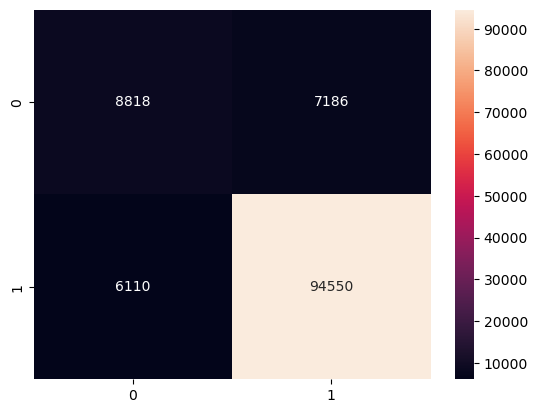

In [52]:
from sklearn.metrics import confusion_matrix

# Call a method predict by using an object classifier 'cls_svm'
y_predict = ramF.predict(X_test)

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_predict)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True, fmt = 'g')